In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from models.disaggregation.dataloader import DisaggregationDataLoader
from models.disaggregation.cnn.model import DisaggregationConvNet

In [79]:
def rmse(y_true, y_pred, axis=None, return_array=False): 
    rmse = np.sqrt(np.mean((y_pred - y_true)**2, axis=axis))
    if return_array: 
        return rmse
    return np.mean(rmse)

In [80]:
# load model
model = DisaggregationConvNet((10, 192, 7), 4, 1)
model.load_model('models/disaggregation/cnn/trained_models/192_cnn_trained.h5')

# load data --> preprocessed, enriched with features
# filtered for "winterly data" as discussed in limitations, converted to kW/h (from (W/h)
path_ = '../data/model_input/schlemminger/disaggregation/ts_192_192_validation.p'
with open(path_, 'rb') as f: 
    x_test, aux_test, y_test = pickle.load(f)

In [81]:
y_pred = model.predict(x_test, aux=aux_test)

161/161 [==============================] - 1s 4ms/step


In [82]:
error = rmse(y_test, y_pred, axis=1)

print(f'Root Mean Squared Error: {error}')

Root Mean Squared Error: 0.7528942993269425


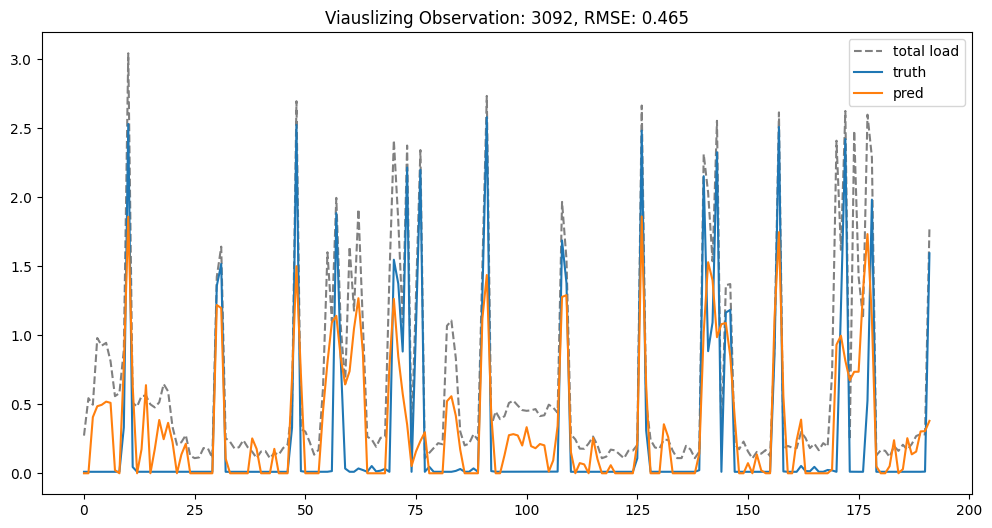

In [83]:
def vis_obs(obs):
    hh, hp, hp_pred = x_test[obs, :, 0], y_test[obs], y_pred[obs]
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(hh, '--', label='total load', color='gray')
    ax.plot(hp, label='truth')
    ax.plot(hp_pred, label='pred')
    plt.title(f'Viauslizing Observation: {obs}, RMSE: {round(rmse(hp, hp_pred), 3)}')
    plt.legend()
    plt.show()
vis_obs(np.random.randint(y_pred.shape[0]))

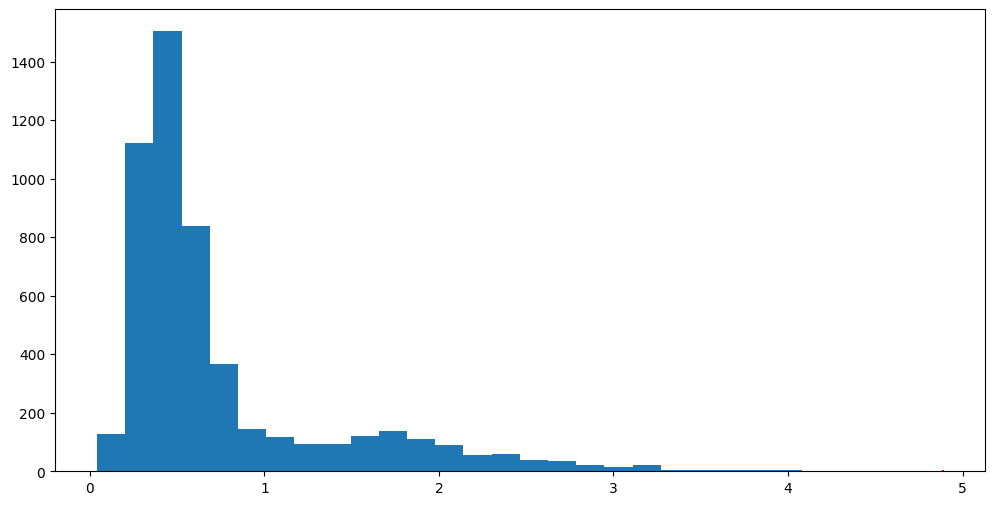

In [96]:
# error distribution 
def error_hist(y_test, y_pred):
    errors = rmse(y_test, y_pred, axis=1, return_array=True)
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.hist(errors, bins=30)
    ax.vlines(np.max(errors), 0, np.max(errors), color='red')
    plt.show()

error_hist(y_test, y_pred)